In [4]:
import sys
print(sys.executable)
print(sys.version)

/home/mariajinxuegarcia/DSB/cell_learning/ForceLearning/.venv/bin/python
3.12.3 (main, Feb  4 2025, 14:48:35) [GCC 13.3.0]


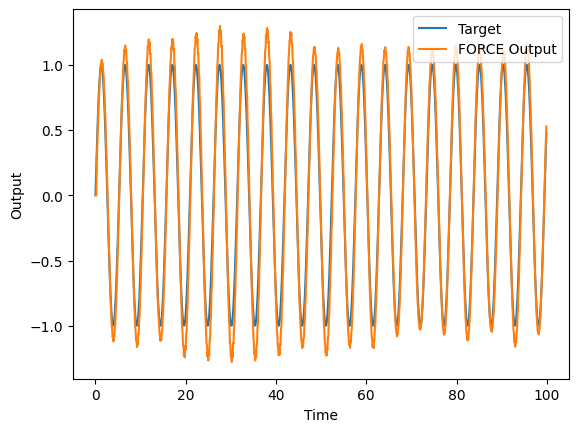

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la red
N = 1000           # Número de neuronas
p = 0.1            # Sparsity de la red
g = 1.5            # Ganancia de la red (caos si >1)
dt = 0.1           # Paso de tiempo
simtime = 1000     # Duración de la simulación
learn_every = 2    # Frecuencia de actualización FORCE

# Inicialización de la red
scale = 1.0/np.sqrt(p*N)
J = np.random.randn(N, N) * g * scale
mask = np.random.rand(N, N) < p
J = J * mask

# Inicialización de los pesos de salida
wo = np.zeros(N)
wf = np.random.randn(N) / np.sqrt(N)

# Inicialización de variables
x = 0.5 * np.random.randn(N)
r = np.tanh(x)
z = 0.0

# Parámetros FORCE
alpha = 1.0
P = (1.0/alpha) * np.eye(N) # initial P

# target function
t = np.arange(0, simtime*dt, dt)
ft = np.sin(1.2 * t)  

# output vector
z_out = np.zeros_like(t)

for i in range(len(t)):
    # Dinámica de la red
    x = (1.0 - dt) * x + J @ (r * dt) + wf * z * dt
    r = np.tanh(x)
    z = wo @ r

    # FORCE learning
    if i % learn_every == 0:
        err = z - ft[i]
        Pr = P @ r
        k = Pr / (1.0 + r.T @ Pr)
        wo = wo - k * err
        P = P - np.outer(k, Pr)

    z_out[i] = z

# Graficar resultado
plt.plot(t, ft, label='Target')
plt.plot(t, z_out, label='FORCE Output')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Output')
plt.show()


/home/mariajinxuegarcia/DSB/cell_learning/ForceLearning/.venv/bin/python
3.12.3 (main, Feb  4 2025, 14:48:35) [GCC 13.3.0]
